In [3]:
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

# Agglomerative CLustering

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
data= pd.read_csv('ilustrasi k means.csv', sep=';')
x=data

In [6]:
x

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


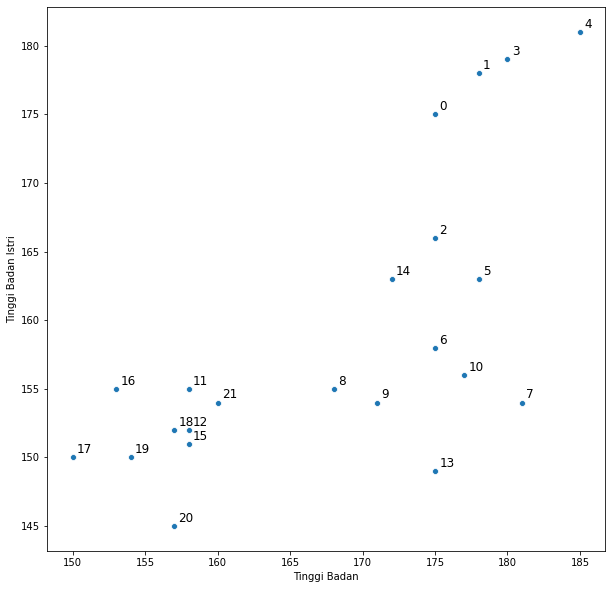

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan',
               y='tinggibadanistri',
                data=x)
plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i,txt in enumerate(range(0,x.shape[0])):
    plt.annotate(txt, (x['tinggibadan'][i]+0.3, x['tinggibadanistri'][i]+0.3), fontsize=12)

## Dendogram

In [11]:
from scipy.cluster.hierarchy import dendrogram, ward, complete, average

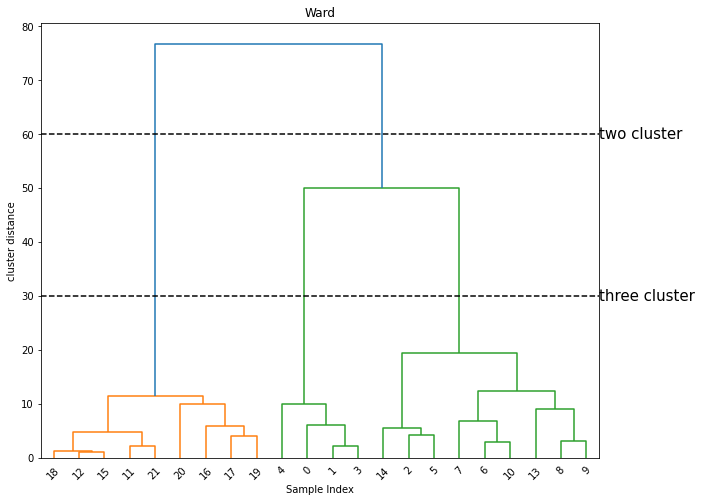

In [13]:
linkage_array= ward(x)

plt.figure(figsize=(10,8))
dendrogram(linkage_array,25)
ax=plt.gca()
bound=ax.get_xbound()

ax.plot(bound,[60,60],'--',c='k')
ax.plot(bound,[30,30],'--',c='k')

ax.text(bound[1],60,'two cluster', va='center', fontdict={'size':15})
ax.text(bound[1],30,'three cluster', va='center', fontdict={'size':15})

plt.title('Ward')
plt.xlabel('Sample Index')
plt.ylabel('cluster distance')

plt.show()

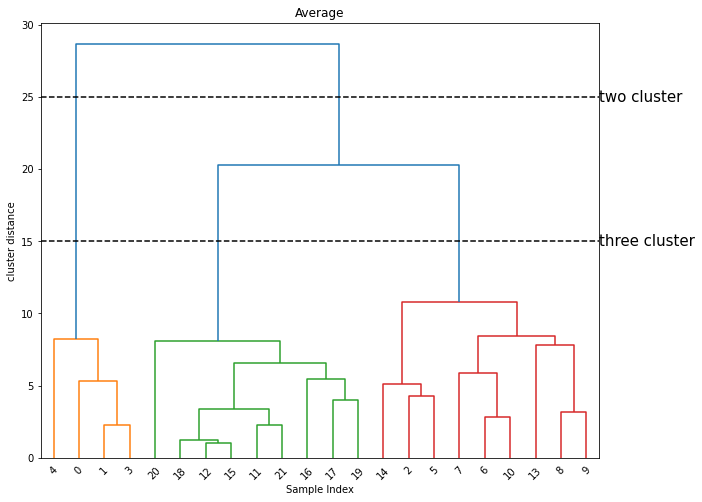

In [14]:
linkage_array= average(x)

plt.figure(figsize=(10,8))
dendrogram(linkage_array,25)
ax=plt.gca()
bound=ax.get_xbound()

ax.plot(bound,[25,25],'--',c='k')
ax.plot(bound,[15,15],'--',c='k')

ax.text(bound[1],25,'two cluster', va='center', fontdict={'size':15})
ax.text(bound[1],15,'three cluster', va='center', fontdict={'size':15})

plt.title('Average')
plt.xlabel('Sample Index')
plt.ylabel('cluster distance')

plt.show()

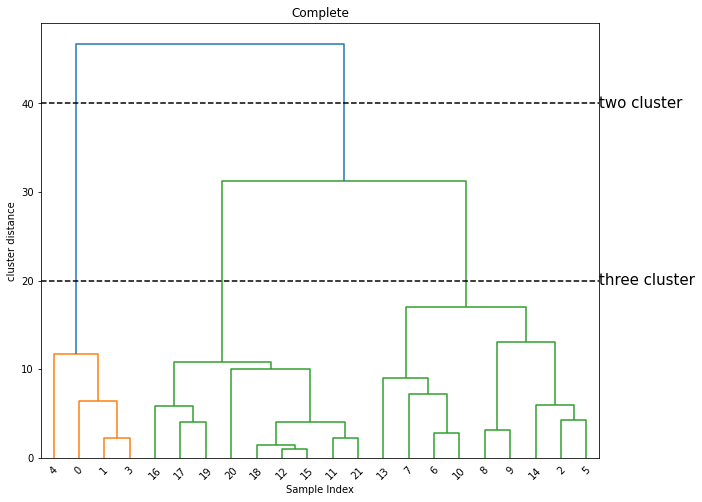

In [15]:
linkage_array= complete(x)

plt.figure(figsize=(10,8))
dendrogram(linkage_array,25)
ax=plt.gca()
bound=ax.get_xbound()

ax.plot(bound,[40,40],'--',c='k')
ax.plot(bound,[20,20],'--',c='k')

ax.text(bound[1],40,'two cluster', va='center', fontdict={'size':15})
ax.text(bound[1],20,'three cluster', va='center', fontdict={'size':15})

plt.title('Complete')
plt.xlabel('Sample Index')
plt.ylabel('cluster distance')

plt.show()

## Results Comparison

In [17]:
agg_ward= AgglomerativeClustering(n_clusters=3, linkage='ward')
data['ward']=agg_ward.fit_predict(x)

agg_average= AgglomerativeClustering(n_clusters=3, linkage='average')
data['average']=agg_average.fit_predict(x)

agg_complete= AgglomerativeClustering(n_clusters=3, linkage='complete')
data['complete']=agg_complete.fit_predict(x)

In [18]:
data

,tinggibadan,tinggibadanistri,ward,average,complete
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1
5,178,163,0,0,0
6,175,158,0,0,0
7,181,154,0,0,0
8,168,155,0,0,0
9,171,154,0,0,0


Text(0, 0.5, 'Tinggi Badan Istri')

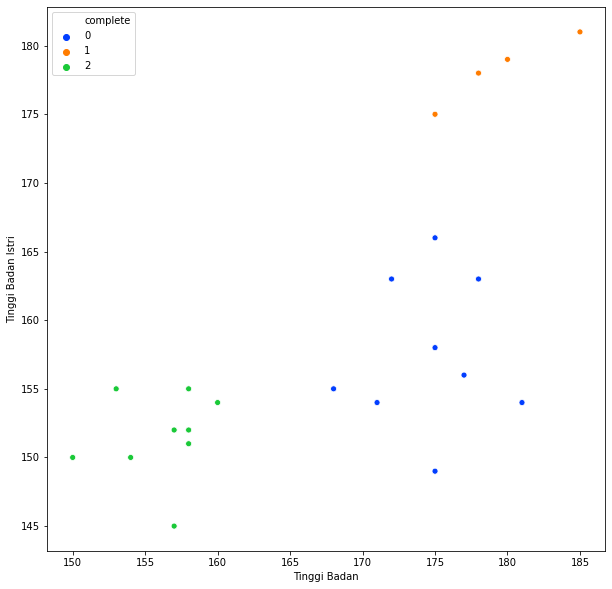

In [21]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=data, hue='complete', palette='bright')

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

# DBSCAN
density-based spatial clustering of applications with noise

In [23]:
data=pd.read_csv('ilustrasi k means.csv',sep=';')
x= data.copy()

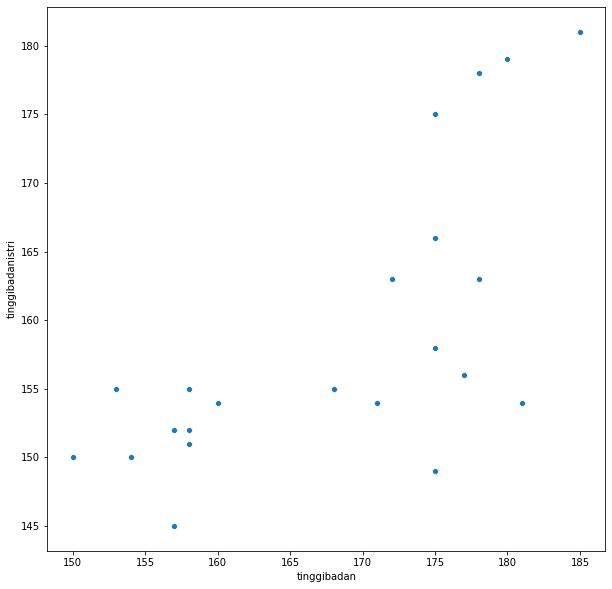

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan',y='tinggibadanistri', data=data)

## Initial Clustering


In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [26]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [29]:
dbscan= DBSCAN(eps=0.8, min_samples=6)
cluster=dbscan.fit_predict(x_scaled)

In [30]:
print(cluster) # -1 adalah noise

[-1 -1  0 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  1  1  1  1]


In [31]:
silhouette_score(x_scaled,cluster)

0.6161772649616482

## Optimizing minimum samples and eps

In [33]:
for eps in [i/10 for i in range (6,8)]:
    for min_samples in range(4,6):
        print(f'\neps {eps}\nmin samples {min_samples}')
        
        dbscan=DBSCAN(eps=eps, min_samples=min_samples)
        labels= dbscan.fit_predict(x_scaled)
        score=silhouette_score(x_scaled,labels) #siluet score perlu minimal 2 cluster, jadi perhatikan nilai eps dan min sample
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'cluster sizes: {np.bincount(labels+1)}')
        print(f'Silhouette score: {score}')


eps 0.6
min samples 4
clusters present: [-1  0  1]
cluster sizes: [7 6 9]
Silhouette score: 0.3901682187136734

eps 0.6
min samples 5
clusters present: [-1  0  1]
cluster sizes: [8 5 9]
Silhouette score: 0.35497113213899967

eps 0.7
min samples 4
clusters present: [0 1 2]
cluster sizes: [0 4 9 9]
Silhouette score: 0.6161772649616482

eps 0.7
min samples 5
clusters present: [-1  0  1]
cluster sizes: [4 9 9]
Silhouette score: 0.6161772649616482


Parameter terbaik adalah eps: 0.7, min samples: 4, karena tidak ada sample yang dianggap sebagai noise (lebih mudah diinterpretasikan) dan memiliki nilai silhouette score tertinggi

## Final Result

In [35]:
dbscan=DBSCAN(eps=0.7, min_samples=4)
labels=dbscan.fit_predict(x_scaled)
data['cluster']=labels

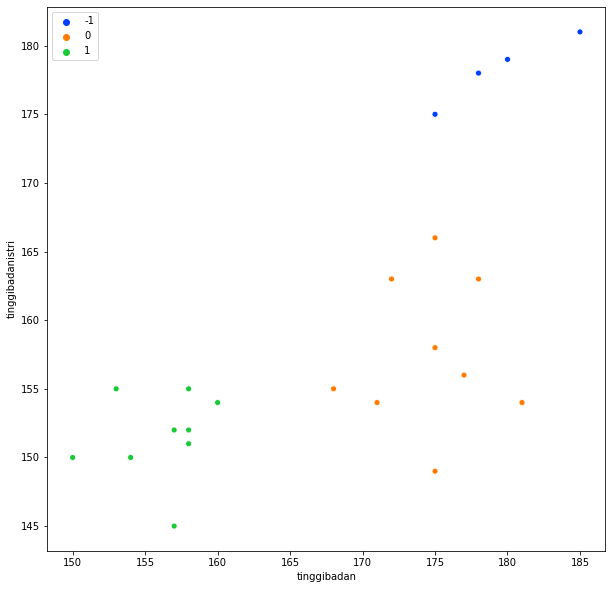

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=data, hue= cluster, palette='bright')

# CLustering 3 dimensi

In [38]:
df=pd.read_csv('Mall_Customers.csv')

In [39]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [45]:
df=df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'})

In [48]:
x= df.loc[:,['Age','Annual Income','Spending Score']]

In [49]:
from mpl_toolkits.mplot3d import axes3d

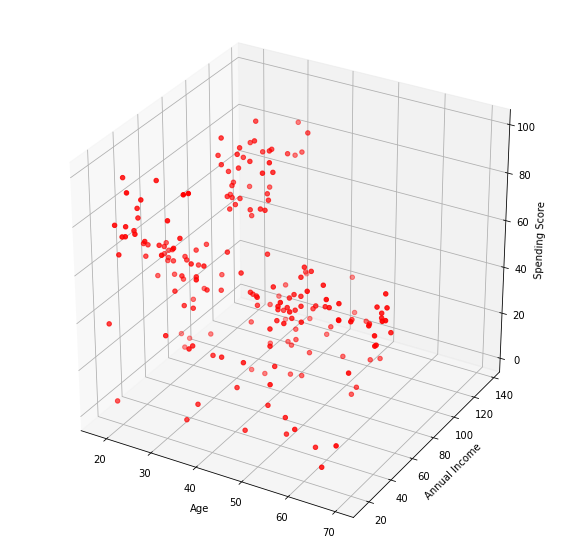

In [51]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(111, projection='3d')

X=x['Age']
Y=x['Annual Income']
Z=x['Spending Score']

ax.scatter(X,Y,Z, c='r', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans= KMeans(n_clusters=6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [54]:
df['cluster']= kmeans.predict(x)

In [55]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,5
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


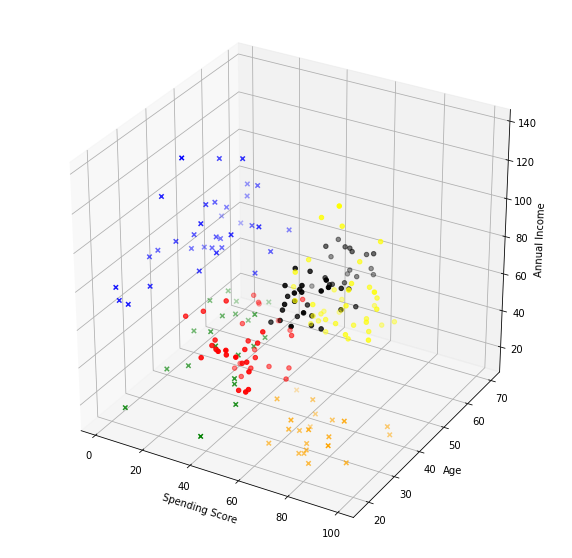

In [62]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(111, projection='3d')

ax.scatter(x['Spending Score'][df['cluster']==0],x['Age'][df['cluster']==0],x['Annual Income'][df['cluster']==0],c='r', marker='o')
ax.scatter(x['Spending Score'][df['cluster']==1],x['Age'][df['cluster']==1],x['Annual Income'][df['cluster']==1],c='b', marker='x')
ax.scatter(x['Spending Score'][df['cluster']==2],x['Age'][df['cluster']==2],x['Annual Income'][df['cluster']==2],c='yellow', marker='o')
ax.scatter(x['Spending Score'][df['cluster']==3],x['Age'][df['cluster']==3],x['Annual Income'][df['cluster']==3],c='g', marker='x')
ax.scatter(x['Spending Score'][df['cluster']==4],x['Age'][df['cluster']==4],x['Annual Income'][df['cluster']==4],c='k', marker='o')
ax.scatter(x['Spending Score'][df['cluster']==5],x['Age'][df['cluster']==5],x['Annual Income'][df['cluster']==5],c='orange', marker='x')



ax.set_xlabel('Spending Score')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income')
plt.show()

In [64]:
df.groupby('cluster').mean()[['Age','Annual Income','Spending Score']]

,Age,Annual Income,Spending Score
cluster,,,
0,27.000000,56.657895,49.131579
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,44.142857,25.142857,19.523810
4,56.155556,53.377778,49.088889
5,25.272727,25.727273,79.363636


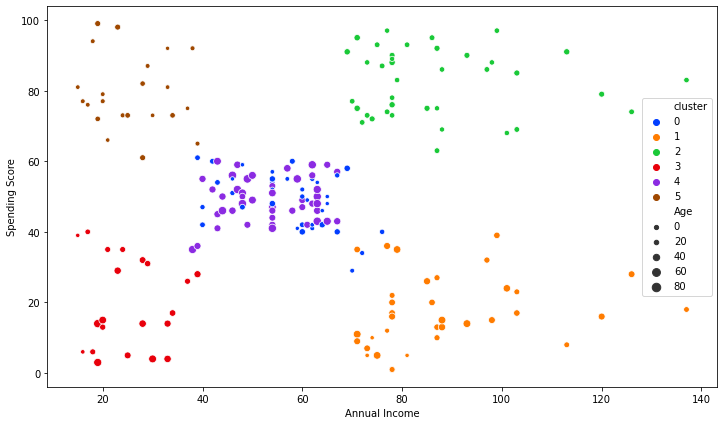

In [65]:
plt.figure(figsize=(12,7))

sns.scatterplot(x='Annual Income',y='Spending Score', data=df, hue='cluster',palette='bright', size='Age')

# Latihan:   
* Gunakan data Mall Customer, fitur **Annual Income, Spending Score dan Age**
* Buatlah Clustering dengan metode:
    * Agglomerative: **bandingkan hasil clustering 3 jenis linkage** (6 cluster) 
    * DBSCAN: **carilah parameter (eps dan min samples) yang optimum**